# Prediction using Unsupervised ML

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## by Ayushi Agiwal

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
from sklearn import preprocessing

In [5]:
le = preprocessing.LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
X=df.iloc[:, 1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
Y=df.iloc[:, -1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

## K-Means Clustering

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered the one of the simplest model among them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**.

In [9]:
#importing required librararies
from sklearn.cluster import KMeans

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [10]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',  n_init = 12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

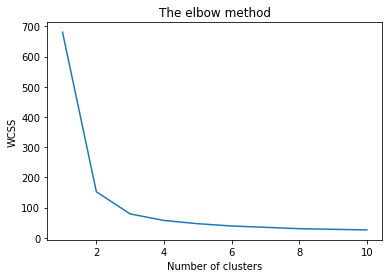

In [11]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimum clusters is where the elbow occurs. Here most optimum no. of cluster is 3.

In [12]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [13]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [14]:
y_kmeans = k_means.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [15]:
k_means.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

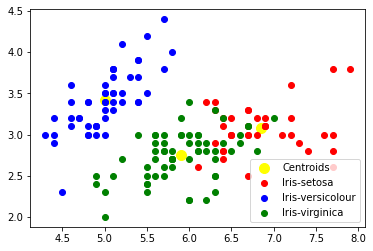

In [16]:
# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0],k_means.cluster_centers_[:, 1], s=100, c = 'yellow', label = 'Centroids')
# Visualising the clusters - On the first two columns
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

plt.legend()

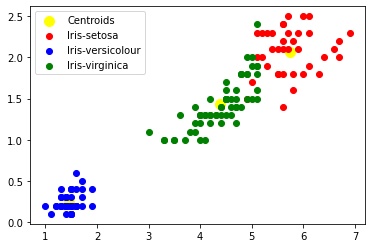

In [17]:
# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, -2],k_means.cluster_centers_[:, -1], s=100, c = 'yellow', label = 'Centroids')
# Visualising the clusters - On the last two columns
plt.scatter(X.iloc[y_kmeans == 0, -2], X.iloc[y_kmeans == 0, -1], c = 'red', label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans == 1, -2], X.iloc[y_kmeans == 1, -1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X.iloc[y_kmeans == 2, -2], X.iloc[y_kmeans == 2, -1], c = 'green', label = 'Iris-virginica')

plt.legend()

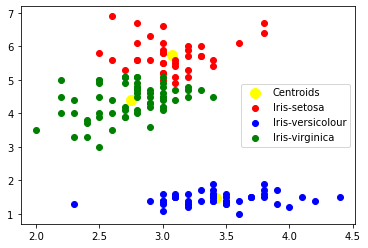

In [18]:
# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 1],k_means.cluster_centers_[:, 2], s=100, c = 'yellow', label = 'Centroids')
# Visualising the clusters - On the middle two columns
plt.scatter(X.iloc[y_kmeans == 0, 1], X.iloc[y_kmeans == 0, 2], c = 'red', label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans == 1, 1], X.iloc[y_kmeans == 1, 2], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X.iloc[y_kmeans == 2, 1], X.iloc[y_kmeans == 2, 2], c = 'green', label = 'Iris-virginica')

plt.legend()